<a href="https://colab.research.google.com/github/GavenDcosta/ML_codes/blob/main/housing_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



In [5]:
# Load the dataset
url = '/content/Housing.csv'
data = pd.read_csv(url)

# Display the first few rows of the dataset
print(data.head())

# Exploratory Data Analysis (EDA)
# Check for null values
print(data.isnull().sum())

# Basic statistics
print(data.describe())



           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7229300521  20141013T000000  231300.0         2       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

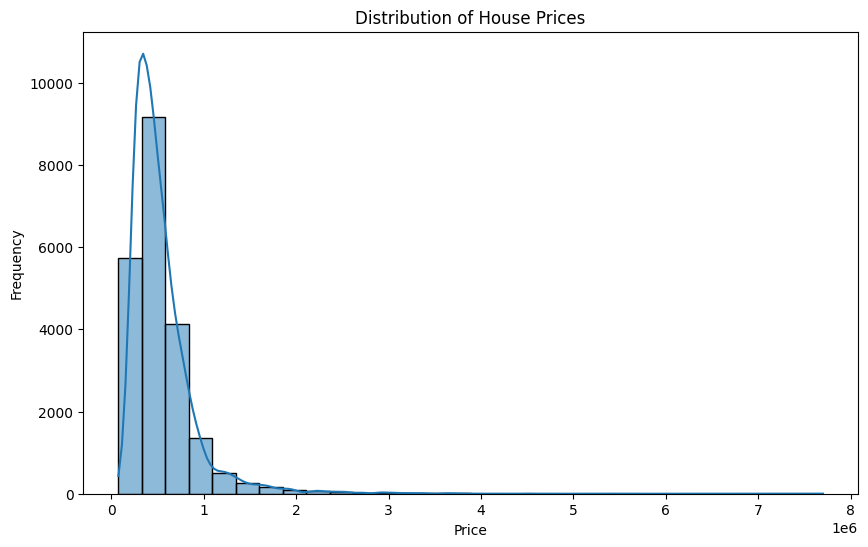

In [6]:
# Distribution of the target variable (price)
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=30, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Drop non-numeric columns for correlation analysis
data_numeric = data.select_dtypes(include=[np.number])




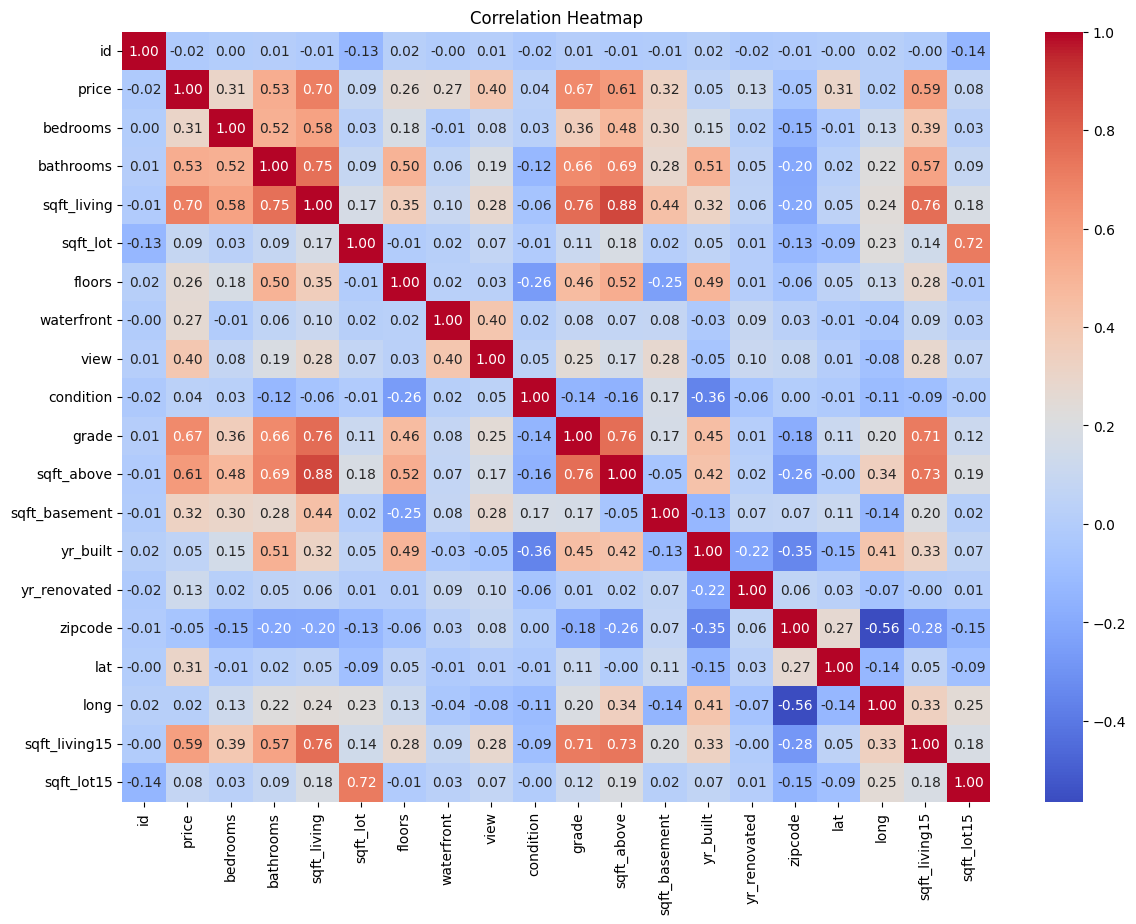

In [7]:
# Correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(data_numeric.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



In [8]:
# Selecting features for the model
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
            'waterfront', 'view', 'condition', 'grade', 'sqft_above',
            'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long']
X = data[features]
y = data['price']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Create a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Calculate accuracy metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [10]:
# Display accuracy metrics
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R^2 Score: {r2:.2f}')



Mean Absolute Error: 127744.71
Mean Squared Error: 45362100371.55
Root Mean Squared Error: 212983.80
R^2 Score: 0.70


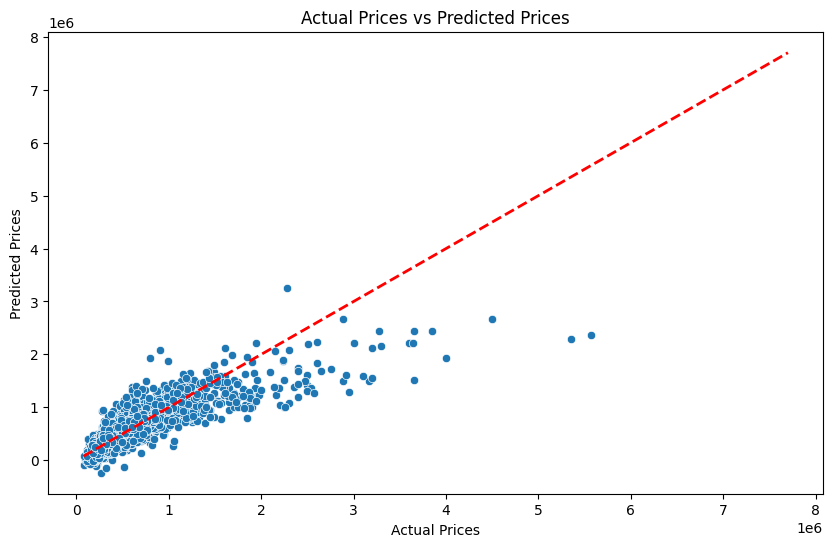

In [11]:
# Visualize the results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()